In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

import scipy as sp
import numpy as np
from datetime import date
from matplotlib.dates import date2num

In [26]:
# correlation=pd.read_csv('/home/schnablelab/Documents/NNSatelliteImages/Figure3/FinalCorrelation.csv')
# correlation['Date'] = pd.to_datetime(correlation['Date'])
# correlation=correlation.drop(['Location','time','Image'], axis=1)
# result=correlation.groupby(['Date','model','image','location'])['r2'].agg([np.mean,np.std])
# result_reset = result.reset_index()
# result_reset=result_reset.loc[result_reset['model']=='RF']

/tmp/ipykernel_891185/3593903248.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([round(x,3) for x in yticks])


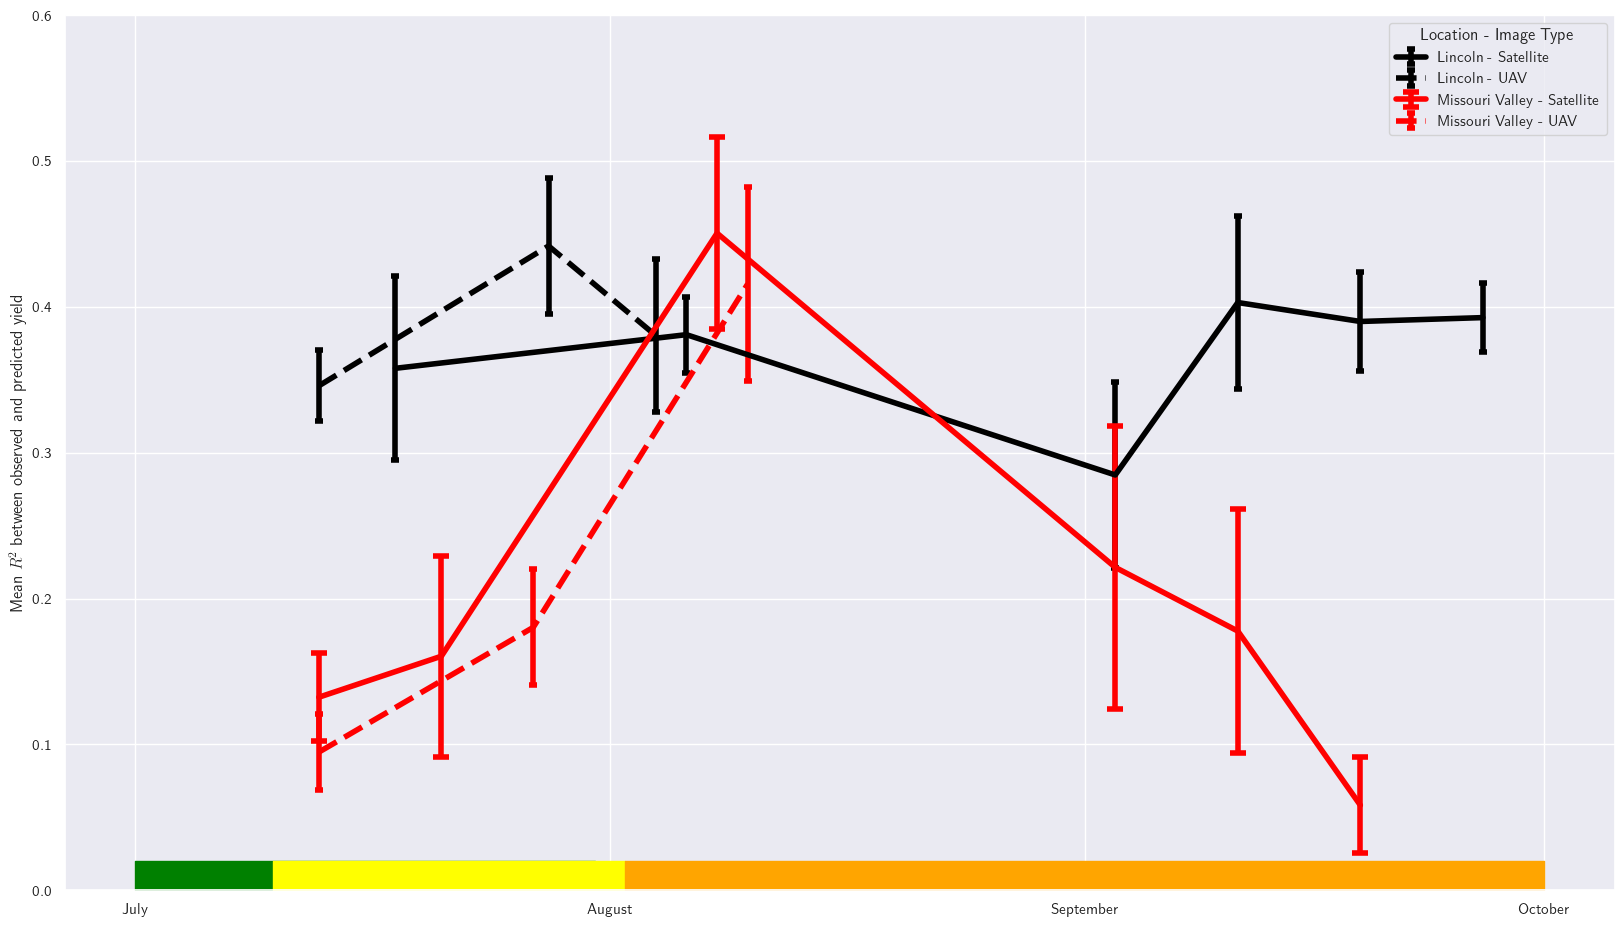

In [29]:
df=pd.read_csv('/home/schnablelab/Documents/NNSatelliteImages/Figure3/FinalCorrelation_mean.csv')

df['Date'] = pd.to_datetime(df['Date'])


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Nimbus Sans",
    "font.size":24
})
# 

fig=plt.figure(figsize=(20,25))

ax1=fig.add_subplot(2,1,1)
df=df.loc[((df['location']=='Missouri Valley') | (df['location']=='Lincoln')),]
df=df.loc[((df['model']=='RF')),]
# Iterate over unique values of 'location'
for location in df['location'].unique():
    # Subset the data for the current location
    subset = df[df['location'] == location]
    
    # Loop through unique line types for the current location
    for line_type in subset['image'].unique():
        # Subset the data for the current line type
        subset_line_type = subset[subset['image'] == line_type]
        
        if line_type=='Satellite' and location=='Missouri Valley':
            plt.errorbar(subset_line_type['Date'], subset_line_type['r2_mean'], 
                         yerr=subset_line_type['r2_se'],
                         label=f"{location} - {line_type}", linestyle='-', color='red',capsize=6, linewidth=4, capthick=4)
        elif line_type=='Satellite' and location=='Lincoln':
            plt.errorbar(subset_line_type['Date'], subset_line_type['r2_mean'], 
                         yerr=subset_line_type['r2_se'], label=f"{location} - {line_type}",
                         linestyle='-', color='black',capsize=3,linewidth=4, capthick=4)
        elif line_type=='UAV'and location=='Missouri Valley':
            plt.errorbar(subset_line_type['Date'], subset_line_type['r2_mean'], 
                         yerr=subset_line_type['r2_se'], label=f"{location} - {line_type}", 
                         linestyle='--', color='red',capsize=3,linewidth=4, capthick=4)
        elif line_type=='UAV'and location=='Lincoln':
            plt.errorbar(subset_line_type['Date'], subset_line_type['r2_mean'], 
                         yerr=subset_line_type['r2_se'], label=f"{location} - {line_type}", 
                         linestyle='--', color='black',capsize=3,linewidth=4, capthick=4)

            
            
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0, 2, 3]  # Define the desired order of legend entries
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Location - Image Type')


# yticks=ax1.get_yticks()
# ax1.set_yticklabels([round(x,3) for x in yticks])

plt.ylabel(r'Mean $R^2$ between observed and predicted yield')

# plt.savefig('/home/schnablelab/Documents/NNSatelliteImages/Figure3/Figure3A.png', dpi=350)

segments = [(date2num(date(2022, 7, 1)), 30)]
plt.broken_barh(segments,(0, 0.02),color="green")

segments = [(date2num(date(2022, 7, 10)), 23)]
plt.broken_barh(segments,(0, 0.02),color="yellow")

segments = [(date2num(date(2022,8,2)),60)]
plt.broken_barh(segments,(0, 0.02),color="orange")

plt.ylim(0,0.6)
yticks=ax1.get_yticks()
ax1.set_yticklabels([round(x,3) for x in yticks])

months = pd.date_range(start='2022-06-15', end='2022-10-30', freq='MS')
month_names = [date.strftime('%B') for date in months]
plt.xticks(months,month_names)

plt.savefig('/home/schnablelab/Documents/NNSatelliteImages/Figure3/Figure3A.png', dpi=350)

plt.show()

In [9]:
segments

[(19206.0, 60)]